<a href="https://colab.research.google.com/github/omkanpariya/omkanpariya/blob/main/sms_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install transformers

In [ ]:
%%capture
!pip install tensorflow

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import nltk

!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


In [ ]:
df = pd.read_csv("/content/sms_spam.csv")
df.head()


,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [ ]:
df.shape

(3, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [ ]:
X = list(df['text'])

In [ ]:
y = list(df['type'])

In [ ]:
y

['A', 'B', 'A']

In [ ]:
pd.get_dummies(y,drop_first=True)

,B
0,False
1,True
2,False


In [ ]:
#Text Preprocessing

import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure the necessary NLTK data is downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Sample DataFrame
data = {'text': ['This is the first sentence.', 'Here is another sentence.', 'And a third sentence.']}
df = pd.DataFrame(data)

# Extracting sentences
sentences = list(df["text"])
corpus = []
lemmatizer = WordNetLemmatizer()

for i in range(len(sentences)):
    sentence = re.sub("[^a-zA-Z]", " ", sentences[i])  # removing all non-alphabets
    sentence = sentence.lower()
    sentence = sentence.split()  # split into words
    sentence = [lemmatizer.lemmatize(word) for word in sentence if word not in set(stopwords.words("english"))]
    sentence = " ".join(sentence)
    corpus.append(sentence)

print(corpus)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['first sentence', 'another sentence', 'third sentence']


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Example DataFrame (replace this with your actual DataFrame)
data = {'text': ['This is the first sentence.', 'Here is another sentence.', 'And a third sentence.'],
        'type': ['A', 'B', 'A']}
df = pd.DataFrame(data)

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english", lowercase=True)

# Fit and transform the text data
X = vectorizer.fit_transform(df["text"])

# Convert the transformed data to a DataFrame
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Extract the target variable
y = df["type"]

# Display the results
print(X_df)
print(y)


   sentence
0       1.0
1       1.0
2       1.0
0    A
1    B
2    A
Name: type, dtype: object


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array(['A'], dtype=object)

In [ ]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix
import numpy as np

# Example data (replace with your actual data)
y_test = np.array([0, 1, 0, 1, 0, 1, 0, 1])  # Replace this with your actual y_test
output = np.array([0, 0, 0, 0, 0, 0, 0, 0])  # Replace this with your actual predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, output)

# Create annotated heatmap
fig = ff.create_annotated_heatmap(
    z=cm,
    x=['Predicted Ham', 'Predicted Spam'],
    y=['Actual Ham', 'Actual Spam'],
    colorscale='Viridis',
    showscale=True
)

# Update layout for better readability
fig.update_layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted Label'),
    yaxis=dict(title='Actual Label')
)

# Show the plot
fig.show()


Score:  1.0


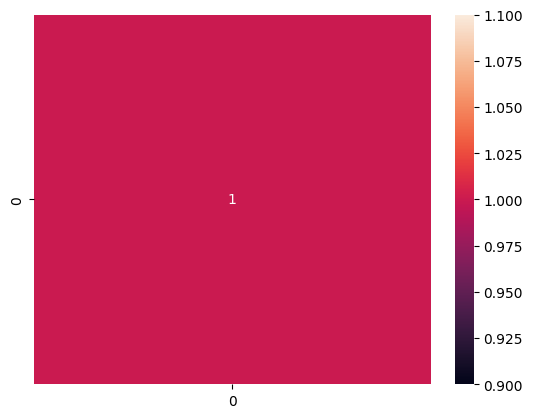

In [ ]:
score = accuracy_score(y_test, y_pred)
print("Score: ", score)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()